## Figure of time overlap

In [1]:
import os 
import joblib
import numpy as np 
import matplotlib.pyplot as plt
#plt.style.use("style.mpl")
# LaTeXフォントを有効にするための設定
plt.rcParams.update({
    "text.usetex": True,  # LaTeXを使用する
    "font.family": "serif",  # 使用するフォントファミリーを指定（serifやsans-serifなど）
    "font.serif": ["Times New Roman"],  # フォントの種類を指定（LaTeXがインストールされた環境で使用可能なもの）
    "text.latex.preamble": r"\usepackage{amsmath}",  # LaTeXプリアンブルにパッケージを追加する（必要に応じて）
})

In [2]:
class CFG:
  N= 100
  M= 6000
  L= 10
  senario = 'CL_fully'
  ini_type = "A"
  data_name= "MNIST"
  data_seed= 4244 #データのサンプリングを固定するためのseed
  seed1 = 820
  seed2 = 314
  seed3 = 1228
  layer_name_list= ['batch_normalization1', 'batch_normalization2', 'batch_normalization3','batch_normalization4', 'batch_normalization5',
                  'batch_normalization6', 'batch_normalization7', 'batch_normalization8','batch_normalization9','batch_normalization10',]

In [3]:
q2 = joblib.load(f'../Result/{CFG.senario}/Overlap/time_q2_{CFG.data_name}_ini{CFG.ini_type}_M{CFG.M}_L{CFG.L}.pkl')
simq = joblib.load(f'../Result/{CFG.senario}/Overlap/time_sim_q_{CFG.data_name}_ini{CFG.ini_type}_M{CFG.M}_L{CFG.L}.pkl')

[None, None, None, None]

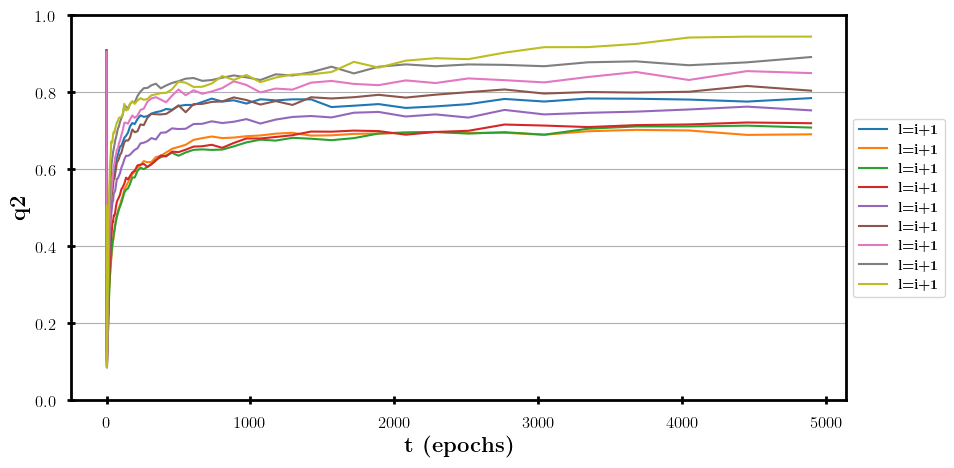

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax.plot(q2['time'],q2[l],label=r'\textbf{l={i+1}}')
ax.set_xlabel(r'\textbf{t (epochs)}',fontsize=16)
ax.set_ylabel(r'\textbf{q2}', fontsize=16)  
#ax.set_xscale('log')
#ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
ax.set_ylim(0,1)
ax.grid(axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, direction='inout', pad=8)
ax.tick_params(axis='both', which='minor', labelsize=10, width=1.5, length=4, direction='inout', pad=6)
plt.setp(ax.spines.values(), linewidth=2)  # 枠線の太さを変更

[None, None, None, None]

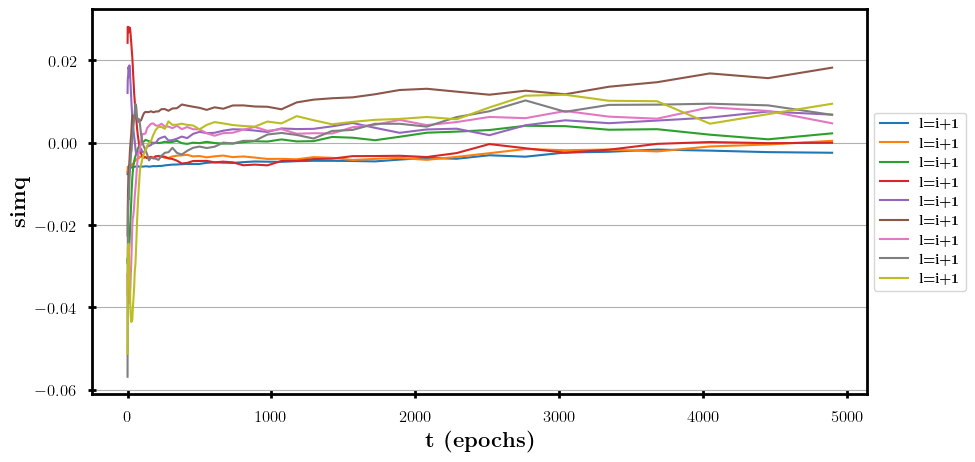

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax.plot(simq['time'],simq[l],label=r'\textbf{l={i+1}}')
ax.set_xlabel(r'\textbf{t (epochs)}',fontsize=16)
ax.set_ylabel(r'\textbf{simq}', fontsize=16)  
#ax.set_xscale('log')
#ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
#ax.set_ylim(-0.1,0.1)
ax.grid(axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, direction='inout', pad=8)
ax.tick_params(axis='both', which='minor', labelsize=10, width=1.5, length=4, direction='inout', pad=6)
plt.setp(ax.spines.values(), linewidth=2)  # 枠線の太さを変更

### q2とsimqの比較

In [24]:
simq1 = joblib.load(f'../Result/CL_fully/Overlap/time_sim_q_MNIST_iniA_M60000_L10.pkl')
simq2 = joblib.load(f'../Result/CL_partial/Overlap/time_sim_q_MNIST_iniA_M60000_L10_G80.pkl')

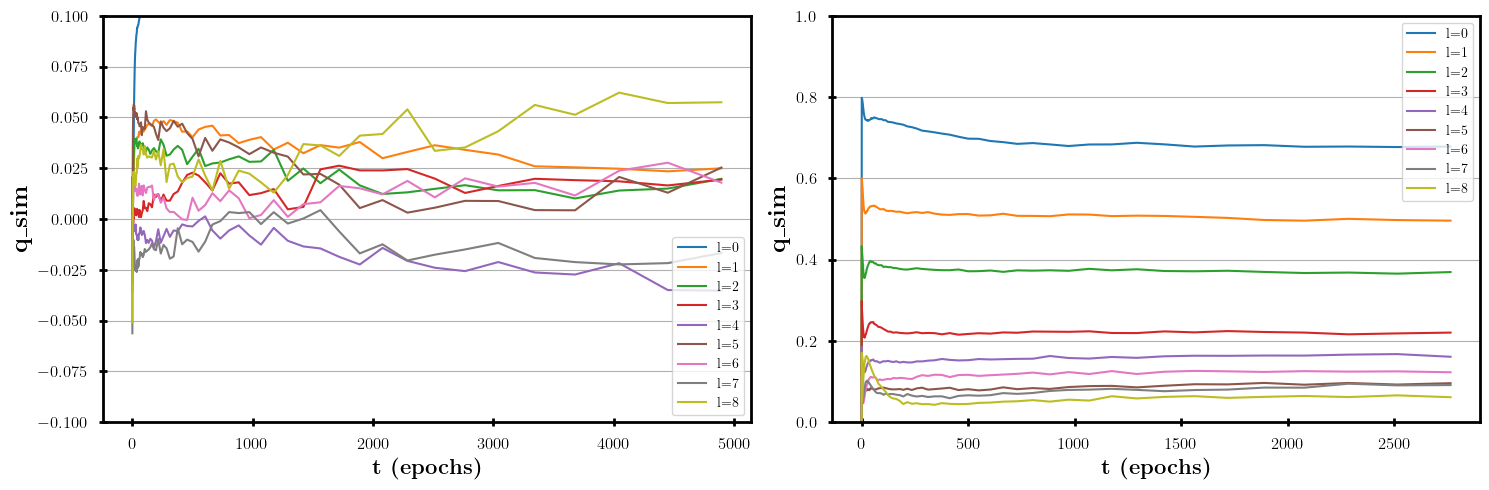

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # 1行2列のサブプロットを作成

# 左側のグラフ
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax1.plot(simq1['time'],simq1[l],linestyle='-',label=f'l={i}')
ax1.set_xlabel(r'\textbf{t (epochs)}',fontsize=16)
ax1.set_ylabel(r'\textbf{q_sim}', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, direction='inout', pad=8)
ax1.tick_params(axis='both', which='minor', labelsize=10, width=1.5, length=4, direction='inout', pad=6)
ax1.grid(axis='y')
ax1.set_ylim(-0.1,0.1)
plt.setp(ax1.spines.values(), linewidth=2)  # 枠線の太さを変更
ax1.legend()

# 右側のグラフ
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax2.plot(simq2['time'],simq2[l], linestyle='-',label=f'l={i}')
ax2.set_xlabel(r'\textbf{t (epochs)}',fontsize=16)
ax2.set_ylabel(r'\textbf{q_sim}', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, direction='inout', pad=8)
ax2.tick_params(axis='both', which='minor', labelsize=10, width=1.5, length=4, direction='inout', pad=6)
ax2.grid(axis='y')
ax2.legend()
ax2.set_ylim(0,1)
plt.setp(ax2.spines.values(), linewidth=2)  # 枠線の太さを変更

plt.tight_layout()  # グラフの間隔を自動調整して見やすくする
plt.show()